In [ ]:
# Read In Data
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

teams_df = pd.read_csv('/content/drive/My Drive/Teams.csv')

Mounted at /content/drive
time: 3.21 s (started: 2025-04-01 01:35:33 +00:00)


Query Time: 0.066 seconds
Total rows with valid win_pct_change: 1404
Sample Output:
    tmID                name  year   win_pct  prev_win_pct  win_pct_change
296  MTL  Montreal Canadiens  1943  0.760000          0.38        0.380000
46   MOC  Montreal Canadiens  1915  0.666667          0.30        0.366667


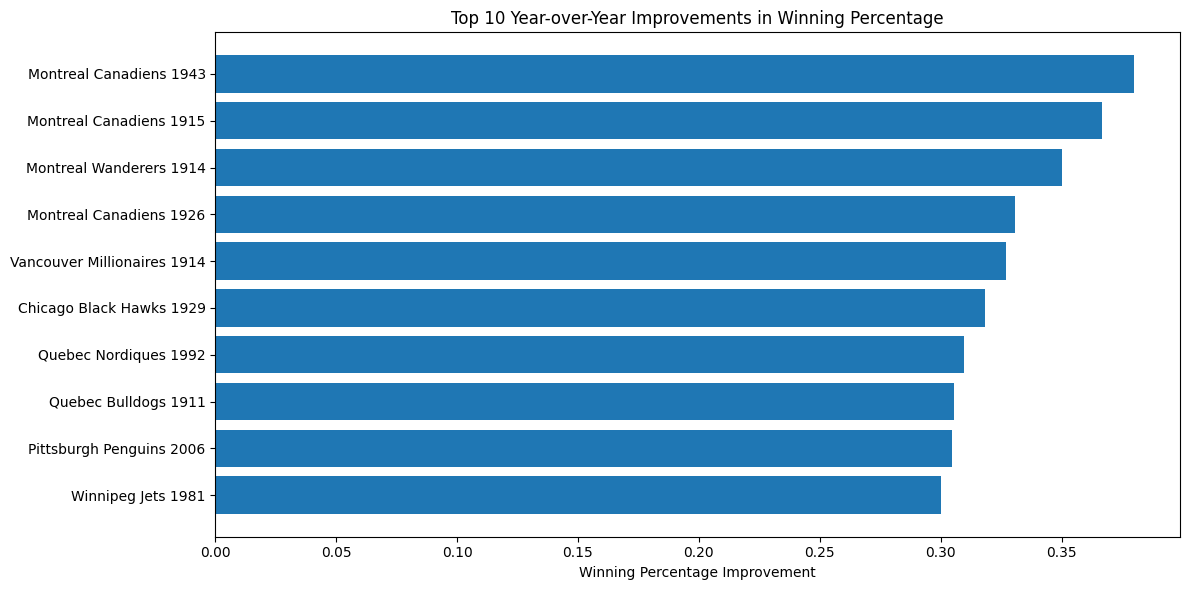

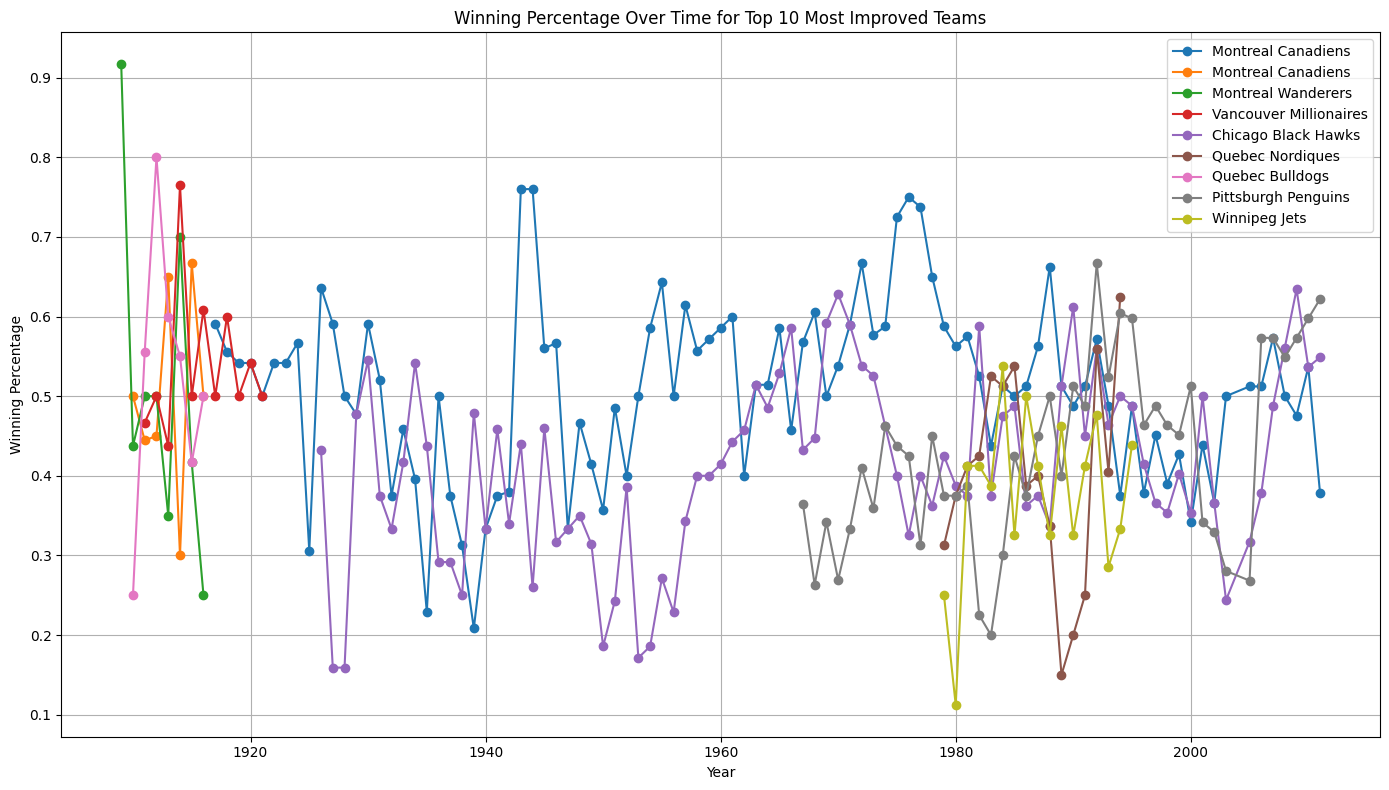

time: 1.34 s (started: 2025-04-01 02:32:20 +00:00)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import time

start_time = time.time()

teams_df["win_pct"] = teams_df["W"] / teams_df["G"]

teams_df_sorted = teams_df.sort_values(by=["tmID", "year"])
teams_df_sorted["prev_win_pct"] = teams_df_sorted.groupby("tmID")["win_pct"].shift(1)
teams_df_sorted["win_pct_change"] = teams_df_sorted["win_pct"] - teams_df_sorted["prev_win_pct"]

improvement_df = teams_df_sorted.dropna(subset=["win_pct_change"])

top_improvements = improvement_df.sort_values(by="win_pct_change", ascending=False).head(10)

query_time = time.time() - start_time
row_count = improvement_df.shape[0]

# Row, Query Time, and Sample

print("Query Time: {:.3f} seconds".format(query_time))
print("Total rows with valid win_pct_change: {}".format(row_count))
print("Sample Output:")
print(top_improvements[["tmID", "name", "year", "win_pct", "prev_win_pct", "win_pct_change"]].head(2))

# Bar Graph of Top 10 Top Improved Teams and their Winning Percentage

plt.figure(figsize=(12, 6))
plt.barh(top_improvements["name"] + " " + top_improvements["year"].astype(str),
         top_improvements["win_pct_change"])
plt.xlabel("Winning Percentage Improvement")
plt.title("Top 10 Year-over-Year Improvements in Winning Percentage")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Line Plot of winning percentage over time for Top 10 Improved Teams

top_teams_ids = top_improvements["tmID"].unique()

top_teams_history = teams_df[teams_df["tmID"].isin(top_teams_ids)].copy()
top_teams_history["win_pct"] = top_teams_history["W"] / top_teams_history["G"]

plt.figure(figsize=(14, 8))
for tmID in top_teams_ids:
    team_data = top_teams_history[top_teams_history["tmID"] == tmID].sort_values(by="year")
    plt.plot(team_data["year"], team_data["win_pct"], marker='o', label=team_data["name"].iloc[0])

plt.xlabel("Year")
plt.ylabel("Winning Percentage")
plt.title("Winning Percentage Over Time for Top 10 Most Improved Teams")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()